In [23]:
import torch
from torchview import draw_graph
import graphviz
graphviz.set_jupyter_format('png')

from models import Approach1MaskPrediction, Approach1EntityClassification, Approach2, Approach3CombinedModel

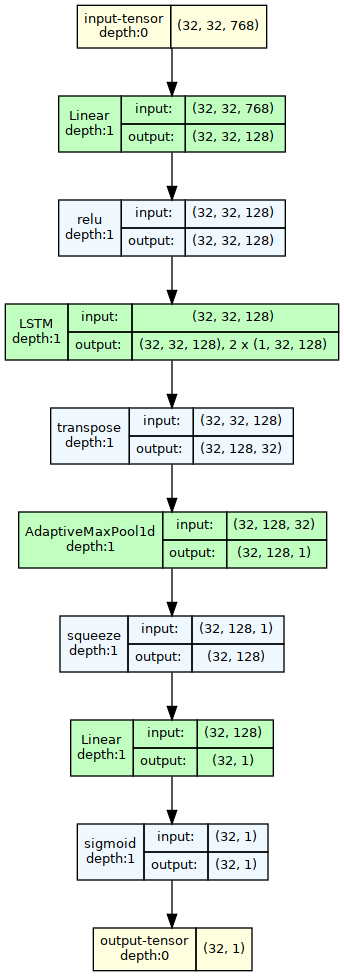

In [25]:
model = Approach1EntityClassification(14859, 128, 13)
# model.load_state_dict(torch.load('models/approach3.pt'))
batch_size = 32
# device='meta' -> no memory is consumed for visualization
# x = torch.randint(0, 14859, (batch_size, 32))
x = torch.randn(batch_size, 32, 768)
model_graph = draw_graph(model, input_data=x, device='meta')
model_graph.visual_graph

In [22]:
# Loss decrease over epochs visualized

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

with open('loss_approach_1_model_1.txt') as f:
    loss_1 = f.readlines()
    loss_1 = [line.strip() for line in loss_1]
    loss_1 = [float(line) for line in loss_1]

with open('loss_approach_1_model_2.txt') as f:
    lines = f.readlines()
    lines = [line.strip() for line in lines]
    lines = [float(line) for line in lines]

print(loss_1)
print(lines)

[0.04932966083288193, 0.01580437645316124, 0.009352709166705608, 0.012975476682186127, 0.004615173675119877, 0.003948438446968794, 0.006538151763379574, 0.009812121279537678, 0.003459841711446643, 0.005228228401392698, 0.005685944575816393, 0.0010777943534776568, 0.0034574181772768497, 0.0027696650940924883, 0.001208689296618104, 0.0013880098704248667, 0.00043430281220935285, 0.0003673290484584868, 0.00017770842532627285, 0.00015939514560159296, 0.0010713906958699226, 4.2254374420735985e-05, 3.738529585461947e-06, 5.783427695860155e-06, 0.00014139816630631685, 1.4189531611918937e-05, 1.5369772881967947e-05, 3.3863295811897842e-06, 1.4289357750385534e-06, 4.622369544904359e-07, 4.992358526578755e-07, 4.6792760599601024e-07, 8.409987458435353e-06, 5.71600821785978e-07, 1.616237170765089e-07, 1.585476297805144e-06, 9.782483090248206e-08, 1.842955441588856e-07, 9.198632078266655e-09, 2.575848156993743e-07, 5.17216278694832e-08, 4.729467306674451e-08, 1.5552004128949193e-08, 4.8022990029039

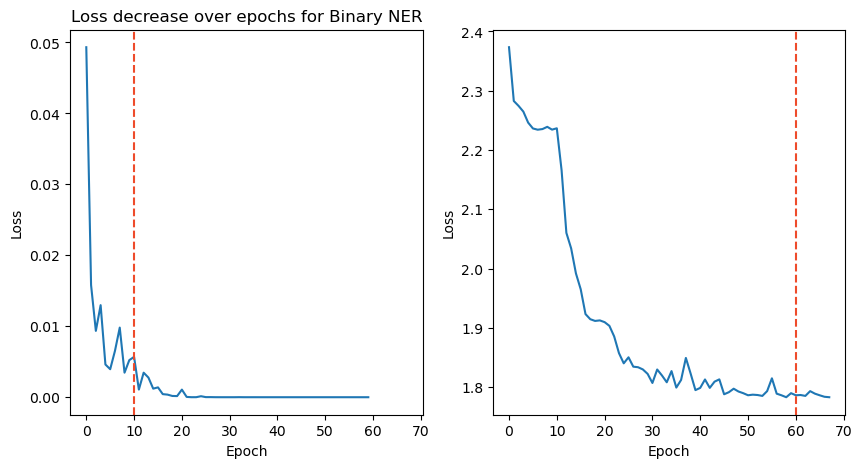

In [26]:
#make vertical subplots
fig, axs = plt.subplots(1, 2, sharex=True, figsize=(10, 5))
axs[0].plot(loss_1, label='Approach 1 Model 1')
axs[0].set_title('Loss decrease over epochs for Binary NER')
axs[0].set_ylabel('Loss')
axs[0].set_xlabel('Epoch')
axs[0].axvline(x=10, color='#EE4B2B', linestyle='--', label='Epoch 10')

axs[1].plot(lines, label='Approach 1 Model 2')
axs[0].set_title('Loss decrease over epochs for Multiclass NER')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].axvline(x=60, color='#EE4B2B', linestyle='--', label='Epoch 10')